In [1]:
import sklearn 
print(sklearn.__version__)

1.4.1.post1


# 1. Linear Regression
### scikit-learn을 이용한 선형회귀 실습

In [3]:
import matplotlib.pyplot as plt 
import pandas as pd

In [6]:
dataset = pd.read_csv('LinearRegressionData.csv')
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


Tip >> iloc[row_num, col_num] : 특정 행과 열의 데이터를 추출하는 방법

In [21]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X, y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64))

In [8]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() # 객체생성
reg.fit(X, y) # 학습 및 모델생성

LinearRegression()

In [9]:
y_pred = reg.predict(X) #검증 = 오차확인
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

# 결과 시각화 

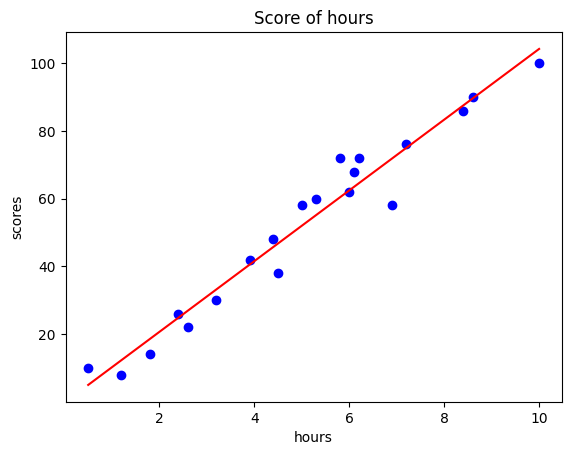

In [10]:
plt.scatter(X, y, color = 'blue')
plt.plot(X, y_pred, color = 'red')
plt.title('Score of hours')
plt.xlabel('hours')
plt.ylabel('scores')
plt.show()

In [12]:
print('예상점수 :', reg.predict([[9], [8]]))

예상점수 : [93.77478776 83.33109082]


C:\Users\ldhsp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [14]:
print(reg.coef_, reg.intercept_) #기울기, 절편

[10.44369694] -0.218484702867201


In [16]:
y_cal = reg.coef_*9 + reg.intercept_
print(y_cal, reg.predict([[9]]))

[93.77478776] [93.77478776]


C:\Users\ldhsp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Data split을 통한 Linear Regression
### train data : X_train / y_train 
### test data  : X_test / y_test 

In [17]:
import matplotlib.pyplot as plt 
import pandas as pd

In [18]:
dataset = pd.read_csv('LinearRegressionData.csv')
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [20]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X, y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64))

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_test, y_train, y_test

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62],
       dtype=int64),
 array([ 90,   8, 100,  38], dtype=int64))

In [24]:
X_train, len(X_train)

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [25]:
X_test, len(X_test)

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

In [26]:
from sklearn.linear_model import LinearRegression
split_reg = LinearRegression()
split_reg.fit(X_train, y_train)

LinearRegression()

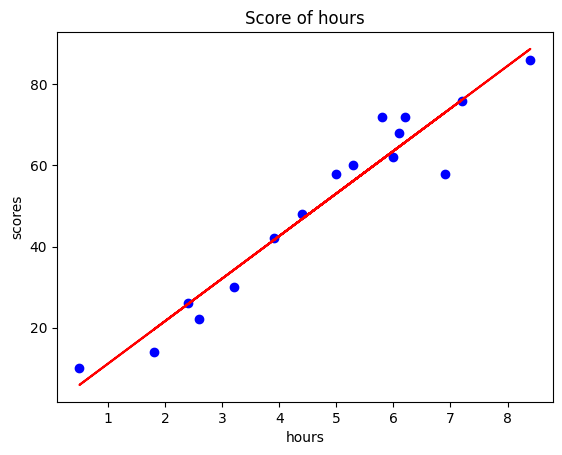

In [27]:
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, split_reg.predict(X_train), color = 'red')
plt.title('Score of hours')
plt.xlabel('hours')
plt.ylabel('scores')
plt.show()

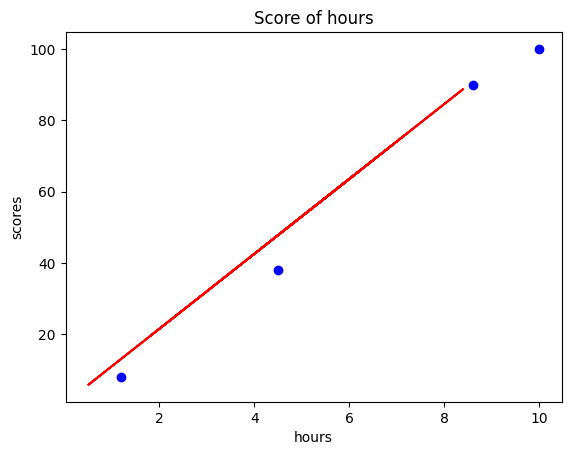

In [28]:
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_train, split_reg.predict(X_train), color = 'red')
plt.title('Score of hours')
plt.xlabel('hours')
plt.ylabel('scores')
plt.show()

In [29]:
reg.coef_, split_reg.coef_, reg.intercept_, split_reg.intercept_

(array([10.44369694]),
 array([10.49161294]),
 -0.218484702867201,
 0.6115562905169369)

# 모델의 평가

In [31]:
split_reg.score(X_test, y_test)

0.9727616474310156

In [32]:
split_reg.score(X_train, y_train)

0.9356663661221668

# 경사하강법 (gradient descent)

In [33]:
from sklearn.linear_model import SGDRegressor
sr = SGDRegressor()
sr.fit(X_train, y_train)

SGDRegressor()

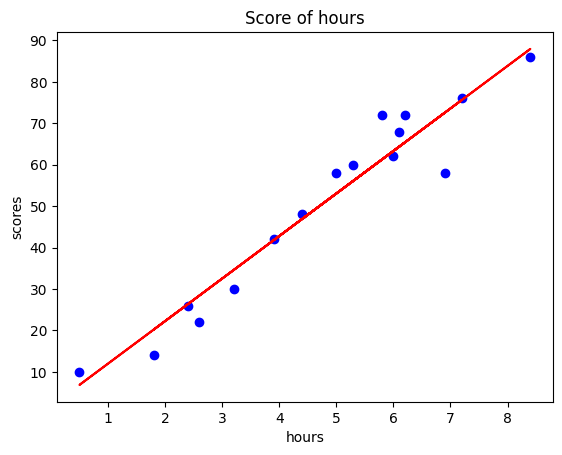

In [35]:
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, sr.predict(X_train), color = 'red')
plt.title('Score of hours')
plt.xlabel('hours')
plt.ylabel('scores')
plt.show()

In [37]:
(sr.coef_, split_reg.coef_, sr.intercept_, split_reg.intercept_)

(array([10.26996109]),
 array([10.49161294]),
 array([1.69598824]),
 0.6115562905169369)

In [38]:
sr.score(X_test, y_test)

0.972944138631977

In [39]:
sr.score(X_train, y_train)

0.9352463029090099

In [46]:
from sklearn.linear_model import SGDRegressor
sr = SGDRegressor(max_iter= 100, eta0=1e-4, random_state=0, verbose=1)
sr.fit(X_train, y_train)

-- Epoch 1
Norm: 0.27, NNZs: 1, Bias: 0.048869, T: 16, Avg. loss: 1484.241876
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.47, NNZs: 1, Bias: 0.083896, T: 32, Avg. loss: 1419.741822
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.64, NNZs: 1, Bias: 0.114272, T: 48, Avg. loss: 1367.983092
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.79, NNZs: 1, Bias: 0.141552, T: 64, Avg. loss: 1322.870279
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.94, NNZs: 1, Bias: 0.166772, T: 80, Avg. loss: 1282.550224
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.07, NNZs: 1, Bias: 0.190476, T: 96, Avg. loss: 1245.587071
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.20, NNZs: 1, Bias: 0.212877, T: 112, Avg. loss: 1211.227118
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 1.32, NNZs: 1, Bias: 0.234194, T: 128, Avg. loss: 1179.037565
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 1.43, NNZs: 1, Bias: 0.254556, T: 144, Avg. loss: 1148.814106
Total training 

C:\Users\ldhsp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(eta0=0.0001, max_iter=100, random_state=0, verbose=1)

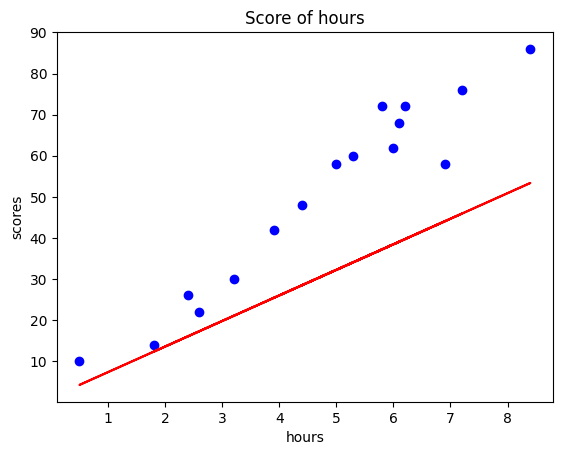

In [47]:
plt.scatter(X_train, y_train, color = 'blue')
plt.plot(X_train, sr.predict(X_train), color = 'red')
plt.title('Score of hours')
plt.xlabel('hours')
plt.ylabel('scores')
plt.show()